# <I>BALL CLASSIFICATION</I>

### <I>Import the Libraries</I>

In [4]:
import numpy as np
import pandas as pd 
import os 
import random
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2
import tensorflow
from keras.preprocessing.image import ImageDataGenerator

### <I>Import data and Split the data into training and testing datasets</I>

In [5]:
TrainingImagePath=R'D:\Datasets\Ball classification\train'
TestingImagePath=R'D:\Datasets\Ball classification\test'
ValidationImagePath=R'D:\Datasets\Ball classification\valid'

In [6]:
# Getting the input of the original data - Training dataset

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [7]:
# Getting the input of the original data - Testing dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
#  Reading the images directly from the directory - Training Dataset

training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 650 images belonging to 13 classes.


In [9]:
#  Reading the images directly from the directory - Testing Dataset

test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 65 images belonging to 13 classes.


In [10]:
#  Reading the images directly from the directory - Validation Dataset

valid_set = test_datagen.flow_from_directory(
        ValidationImagePath,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 65 images belonging to 13 classes.


In [11]:
# Display of Images

def showImages(class_name):
    random_index = random.choice(list(range(1, 49)))
    folder_path=os.path.join(TrainingImagePath, class_name)
    try:
        image_path=os.path.join(folder_path,str(random_index).zfill(3)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    except:
        image_path=os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    plt.title(class_name)
    plt.axis(False)

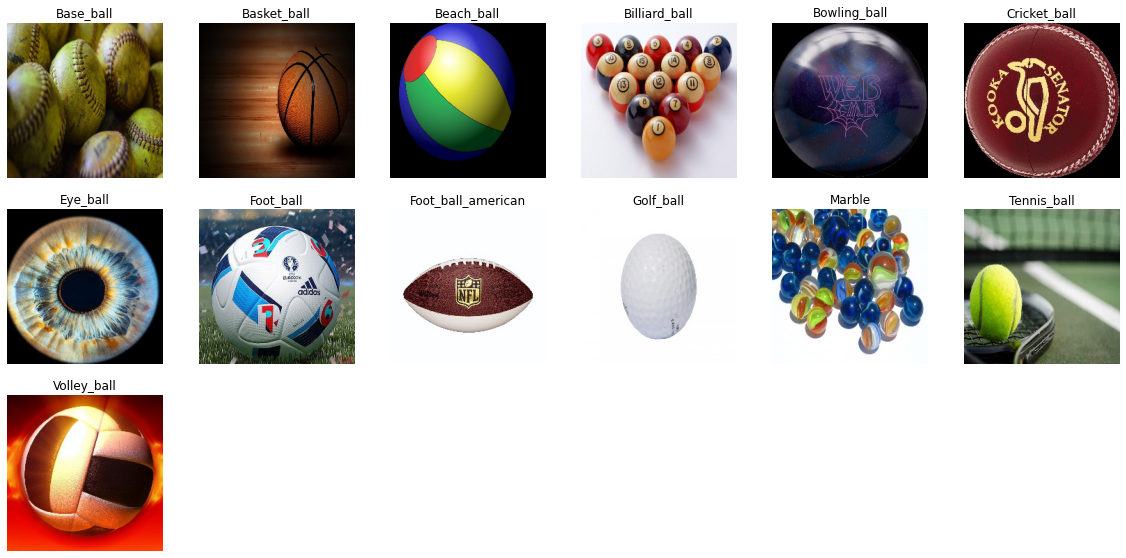

In [12]:
plt.figure(figsize = (20,20))
for labels,number in training_set.class_indices.items():
    plt.subplot(6,6,number+1)
    showImages(labels)

In [13]:
# Display of Classes

test_set.class_indices

{'Base_ball': 0,
 'Basket_ball': 1,
 'Beach_ball': 2,
 'Billiard_ball': 3,
 'Bowling_ball': 4,
 'Cricket_ball': 5,
 'Eye_ball': 6,
 'Foot_ball': 7,
 'Foot_ball_american': 8,
 'Golf_ball': 9,
 'Marble': 10,
 'Tennis_ball': 11,
 'Volley_ball': 12}

In [14]:
TrainClasses=training_set.class_indices

In [15]:
ResultMap={}
for ballValue,ballName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[ballValue]=ballName

In [16]:
print("Mapping of Face and its ID",ResultMap)

Mapping of Face and its ID {0: 'Base_ball', 1: 'Basket_ball', 2: 'Beach_ball', 3: 'Billiard_ball', 4: 'Bowling_ball', 5: 'Cricket_ball', 6: 'Eye_ball', 7: 'Foot_ball', 8: 'Foot_ball_american', 9: 'Golf_ball', 10: 'Marble', 11: 'Tennis_ball', 12: 'Volley_ball'}


In [17]:
# Total Number of Neurons

OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


 The Number of output neurons:  13


### <I>Build the neural network<I>

In [18]:
# Importing Models

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

### <I>Input layer, Hidden layer, and Output layer<I>

In [19]:
# Convolutional Neural Network
classifier= Sequential()

# Layer 1
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(224,224,3), activation='relu'))

# Pooling 1
classifier.add(MaxPool2D(pool_size=(2,2)))

# Layer 2
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

# Pooling 2
classifier.add(MaxPool2D(pool_size=(2,2)))

# Layer 3
classifier.add(Convolution2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

# Pooling 3
classifier.add(MaxPool2D(pool_size=(2,2)))

# Flatten
classifier.add(Flatten())

# Connected Neural Network
classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

# Compiling Convolution Neural Network
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])


In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

### <I>Training the Dataset<I>

In [21]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
model_history=classifier.fit(
                                training_set,
                                steps_per_epoch=len(training_set),
                                epochs=40,
                                validation_data=valid_set,
                                validation_steps=len(valid_set),
                                verbose=1)

EndTime=time.time()
print("Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

Epoch 1/40
21/21 [==============================] - 18s 823ms/step - loss: 3.4413 - accuracy: 0.1046 - val_loss: 2.4207 - val_accuracy: 0.0769
Epoch 2/40
21/21 [==============================] - 19s 891ms/step - loss: 2.4061 - accuracy: 0.2338 - val_loss: 2.1962 - val_accuracy: 0.2308
Epoch 3/40
21/21 [==============================] - 19s 892ms/step - loss: 1.9452 - accuracy: 0.3785 - val_loss: 1.6656 - val_accuracy: 0.5077
Epoch 4/40
21/21 [==============================] - 20s 934ms/step - loss: 1.5545 - accuracy: 0.5062 - val_loss: 1.3903 - val_accuracy: 0.5846
Epoch 5/40
21/21 [==============================] - 23s 1s/step - loss: 1.3090 - accuracy: 0.6046 - val_loss: 1.1865 - val_accuracy: 0.5538
Epoch 6/40
21/21 [==============================] - 19s 864ms/step - loss: 1.0447 - accuracy: 0.6892 - val_loss: 0.9875 - val_accuracy: 0.7231
Epoch 7/40
21/21 [==============================] - 18s 852ms/step - loss: 0.9048 - accuracy: 0.7338 - val_loss: 1.0000 - val_accuracy: 0.7077
Ep

### <I>Evaluation Result<I>

In [22]:
# Accuracy and Loss

accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']


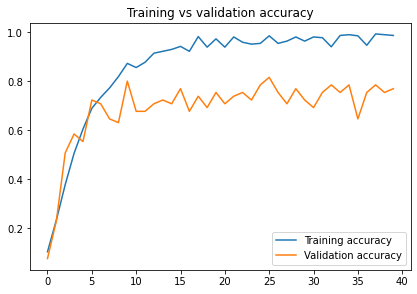

In [23]:
# Pictorial representation of Training Vs Validation accuracy

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

plt.show()

In [24]:
classifier.save(R"/content/drive/MyDrive/Programs/Balls/classifier.pkl")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Programs/Balls/classifier.pkl\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Programs/Balls/classifier.pkl\assets


In [25]:
# Evaluation

evaluate = classifier.evaluate(valid_set)
print(evaluate)

3/3 [==============================] - 0s 79ms/step - loss: 1.6278 - accuracy: 0.7692
[1.6278358697891235, 0.7692307829856873]


In [26]:
# Prediction

predictions = classifier.predict(valid_set)
print(predictions)

3/3 [==============================] - 0s 82ms/step
[[5.60048015e-12 8.90825294e-21 1.32267464e-14 8.63489103e-23
  6.33524060e-20 3.81350144e-13 1.17788352e-30 3.57769485e-16
  1.03571363e-24 4.92176522e-09 8.80548548e-19 1.00000000e+00
  6.24618358e-14]
 [3.48657743e-08 1.66066812e-07 6.70214856e-11 7.61497723e-12
  4.18265378e-09 9.75109756e-01 3.03144931e-09 2.47392700e-06
  2.48869080e-02 6.83442295e-07 2.29501662e-08 5.87506779e-12
  4.10197050e-14]
 [5.75190710e-18 4.18649246e-13 9.41844404e-01 6.40333064e-10
  5.77344261e-02 2.55345788e-12 3.82723604e-14 4.05212195e-04
  2.77486503e-14 1.84189339e-12 9.30513806e-07 7.41504659e-16
  1.50974874e-05]
 [6.91873249e-14 1.72655543e-08 2.67894825e-06 8.73980228e-12
  9.99982238e-01 1.56419205e-16 4.75701567e-09 1.85258884e-08
  2.42206715e-16 7.76935460e-12 1.37851985e-05 3.61176007e-17
  1.30088347e-06]
 [3.64732057e-01 1.49402078e-02 3.95148024e-02 3.69183114e-03
  2.12733321e-05 6.57181081e-04 2.21651237e-04 2.51601152e-02
  2.5773

### <I>Classification result of a selected image [Optional]<I>

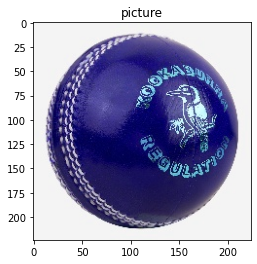

################################
Prediction is:  Cricket_ball


In [28]:
# Classification result of a selected image [Optional]

from tensorflow.keras.utils import load_img, img_to_array

testImage=R"D:\Datasets\Ball classification\test\Cricket_ball\3.jpg"
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*8)
print('Prediction is: ',ResultMap[np.argmax(result)])

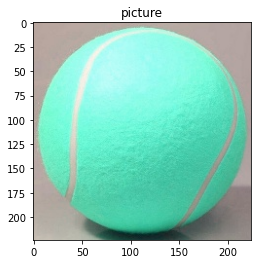

################################
Prediction is:  Tennis_ball


In [29]:
# Classification result of a selected image [Optional]

from tensorflow.keras.utils import load_img, img_to_array

testImage=R"D:\Datasets\Ball classification\test\Tennis_ball\3.jpg"
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*8)
print('Prediction is: ',ResultMap[np.argmax(result)])

### <I>Additional Feature</I>

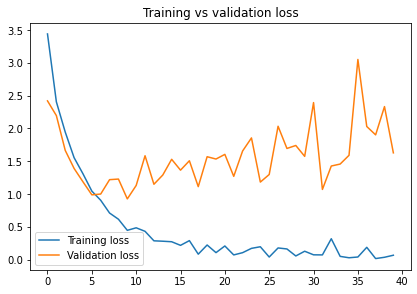

In [30]:
# Pictorial representation of Training Vs Validation loss

plt.figure(figsize=(15,10))

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()